In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dirImagens(pDirImagem):
    try:
        if (not os.path.isdir(pDirImagem)):
            os.mkdir(pDirImagem)
    except OSError as e:
        print(e.args[1])
    
def abriPlanilha():
    diretorio='./data/'
    for arquivo in os.listdir(diretorio):
        if ((re.findall('GRUPOS', str.upper(arquivo))) and          
            (re.findall('csv', arquivo))
           ):
            return (diretorio+arquivo)
    
dirImagens('Imagens2')
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
ins.head()

,Situação,Nº de Inscrição,Nome Completo,CPF,Data/Nasc,Gênero,Ensino,Instituição,Telefone,E-mail,CEP,Bairro,Cidade,grupo,Perfis,Camiseta,Resposta Forms
0,No grupo,1.0,Isabelle Victoria Pereira De Souza,51454217880,12/09/2003,Feminino,Ensino Superior,Belas Artes,11954852961,isabellevictoria.urs@gmail.com,08121-620,Jd Nélia,São Paulo,GRUPO 7,Desenvolvedor,Tamanho de Camiseta: M,NaN
1,NaN,16.0,Uara sales alves de sousa,40974681890,09/02/2004,Feminino,Superior incompleto,FIAP,11960953194,Uarasales09@gmail.com,4209001,Ipiranga,São Paulo,N,Universitário,Tamanho de Camiseta: P,NaN
2,No grupo,5.0,Gabriel Vinícius Rocha Barboza,46993988801,17/01/2005,Masculino,Cursando Ensino Superior em Análise e desenvol...,"Instituto Federal de Ciência, Tecnologia e Ed...",(11) 94585-0708,gabrielrochabarboza@gmail.com,07135-720,Vila Sítio dos Morros,Guarulhos,N,Desenvolvedor,Tamanho de Camiseta: G,Sim
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
colunas=['situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','grupo','perfil','camiseta','respostaForms']

ins.columns=colunas

In [5]:
def columnsDrop():
    ins.drop(['nroInscricao','cpf','telefone','email','cep','bairro'], axis=1, inplace=True)
    ins.dropna(axis=0, subset=['dataNascimento','genero','escolaridade','cidade','grupo','perfil'], inplace=True)
    
columnsDrop()
ins.head(5)

,situacao,nome,dataNascimento,genero,escolaridade,instituicao,cidade,grupo,perfil,camiseta,respostaForms
0,No grupo,Isabelle Victoria Pereira De Souza,12/09/2003,Feminino,Ensino Superior,Belas Artes,São Paulo,GRUPO 7,Desenvolvedor,Tamanho de Camiseta: M,NaN
1,NaN,Uara sales alves de sousa,09/02/2004,Feminino,Superior incompleto,FIAP,São Paulo,N,Universitário,Tamanho de Camiseta: P,NaN
2,No grupo,Gabriel Vinícius Rocha Barboza,17/01/2005,Masculino,Cursando Ensino Superior em Análise e desenvol...,"Instituto Federal de Ciência, Tecnologia e Ed...",Guarulhos,N,Desenvolvedor,Tamanho de Camiseta: G,Sim
5,No grupo,Nicoli Mian Ventura de Paula,27/10/2006,Feminino,Ensino médio,Eniac,Arujá,GRUPO 02,Universitário,Tamanho de Camiseta: M,Sim
6,No grupo,Marcus Vinicius Gomes Pereira,03/11/2004,Masculino,Ensino médio,NaN,São Paulo,GRUPO 02,Universitário,Tamanho de Camiseta: GG,Sim


In [6]:
def columnsInsert():
    ins.insert(1, 'situacaoAjustada', '')
    ins.insert(4, 'dataNascAjustada', ' ')
    ins.insert(5, 'idade', 0)
    ins.insert(7, 'generoId', 99)
    ins.insert(9, 'escolaridadeId', 0)
    ins.insert(10, 'escolaridade2', ' ')
    ins.insert(12, 'instituicaoId', 0)
    ins.insert(13, 'instituicaoAjustada', '')
    ins.insert(15, 'cidadeId', 0)
    ins.insert(19, 'tamanhoCamisetaId', 0)
    
columnsInsert()

In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 86
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   situacao             63 non-null     object
 1   situacaoAjustada     64 non-null     object
 2   nome                 64 non-null     object
 3   dataNascimento       64 non-null     object
 4   dataNascAjustada     64 non-null     object
 5   idade                64 non-null     int64 
 6   genero               64 non-null     object
 7   generoId             64 non-null     int64 
 8   escolaridade         64 non-null     object
 9   escolaridadeId       64 non-null     int64 
 10  escolaridade2        64 non-null     object
 11  instituicao          59 non-null     object
 12  instituicaoId        64 non-null     int64 
 13  instituicaoAjustada  64 non-null     object
 14  cidade               64 non-null     object
 15  cidadeId             64 non-null     int64 
 16  grupo          

### Tabela output.

In [8]:
ins.sort_values(by=['grupo','nome'], inplace=True)
ins

,situacao,situacaoAjustada,nome,dataNascimento,dataNascAjustada,idade,genero,generoId,escolaridade,escolaridadeId,...,instituicao,instituicaoId,instituicaoAjustada,cidade,cidadeId,grupo,perfil,camiseta,tamanhoCamisetaId,respostaForms
7,No grupo,,Laís Souza,11/02/2007,,0,Feminino,99,Ensino médio,0,...,Eniac,0,,Guarulhos,0,GRUPO 02,Universitário,Tamanho de Camiseta: P,0,Sim
6,No grupo,,Marcus Vinicius Gomes Pereira,03/11/2004,,0,Masculino,99,Ensino médio,0,...,NaN,0,,São Paulo,0,GRUPO 02,Universitário,Tamanho de Camiseta: GG,0,Sim
8,No grupo,,Maria Clara Pereira Elídio,09/04/2007,,0,Feminino,99,Ensino médio,0,...,Eniac,0,,Guarulhos,0,GRUPO 02,Universitário,Tamanho de Camiseta: G,0,NaN
5,No grupo,,Nicoli Mian Ventura de Paula,27/10/2006,,0,Feminino,99,Ensino médio,0,...,Eniac,0,,Arujá,0,GRUPO 02,Universitário,Tamanho de Camiseta: M,0,Sim
12,No grupo,,Ana samira velasquez chinchilla,01/05/2002,,0,Feminino,99,Ensino superior incompleto,0,...,f,0,,São Paulo,0,GRUPO 03,Universitário,Tamanho de Camiseta 3: GG,0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Desistência,,Anaíle Silva de Oliveira,19/02/2002,,0,Feminino,99,Ensino Superior Incompleto,0,...,Universidade São Judas Tadeu,0,,Guarulhos,0,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,0,NaN
37,No grupo,,Cristhian Ruescas,29/07/2003,,0,Masculino,99,Cursando Faculdade,0,...,Cursando Faculdade,0,,São Paulo,0,N,Desenvolvedor,Tamanho de Camiseta: G,0,NaN
2,No grupo,,Gabriel Vinícius Rocha Barboza,17/01/2005,,0,Masculino,99,Cursando Ensino Superior em Análise e desenvol...,0,...,"Instituto Federal de Ciência, Tecnologia e Ed...",0,,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: G,0,Sim
55,No grupo,,Thiago Oliveira Caldas,25/12/2005,,0,Masculino,99,Ensino médio - (Último ano em curso),0,...,NaN,0,,São Vicente,0,N,Meu Primeiro Hackathon,Tamanho de Camiseta: G,0,NaN


### Biblioteca de funções.

In [9]:
def situacao(situacao) -> str:
    if (pd.isnull(situacao)):
        return 'N/D'

    situacao=situacao.upper()
    if (re.findall('GRUPO', situacao)):
        return 'SIM'
    else:
        return 'NÃO'
   
def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    if (pd.isnull(pDataNascimento)):
        if (éIdade):
            return 0
        else:
            return "Não informada!"
    
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return 0
            
        else:
            return 0
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        # Ano negativo!
        if (anos<0):
            anos=0
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    if (pd.isnull(genero)):
        return 0
    else:
        genero=genero.upper(); genero=str.strip(genero)
    if (genero=='FEMININO'):
        return 1
    elif (genero=='MASCULINO'):
        return 2
    elif (re.search('N[AÃ]O BIN[AÁ]RIO', genero)):
        return 3
    elif (re.search('PREFIRO N[AÃ]O INFORMAR', genero)):
        return 4
    else:
        return 99

def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    valor=0
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        valor=10
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    texto='N/D'
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        texto='ENS.MÉDIO'
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def instituicaoAjustada(pInst) -> list:
    if (pd.isnull(pInst)):
        return ['Não Informada!',0]
    else:
        pInst=pInst.upper(); pInst=str.strip(pInst)

    if (re.findall('ENIAC',pInst)):
        inst=['ENIAC',1]
    elif (re.findall('INSTITUTO FEDERAL',pInst) or 
          re.findall('IF',pInst)
         ):
        inst=['IFSP',2]
    elif (re.findall('USP',pInst) or 
         re.findall('UNIVERSIDADE DE S[AÃ]O PAULO',pInst)):
        inst=['USP',3]
    elif (re.findall('BELAS ARTES', pInst)):
        inst=['BELAS ARTES',4]
    elif (re.findall('FATEC', pInst) or re.findall('FACULDADE DE TECNOLOGIA DE GUARULHOS', pInst)):
        inst=['FATEC',5]
    elif (re.findall('WYDEN', pInst)):
        inst=['WYDEN',6]
    elif (re.findall('JUDAS', pInst)):
        inst=['UNIV.SÃO JUDAS',7]
    elif (re.findall('FIAP', pInst)):
        inst=['FIAP',8]
    elif (re.findall('UNICAMP', pInst) or
         re.findall('CAMPINAS', pInst)):
        inst=['UNICAMP',9]
    elif (re.findall('ETEC', pInst)):
        inst=['ETEC',10]
    elif (re.findall('LICEU', pInst)):
        inst=['LICEU',11]
    elif (re.findall('MOACYR CAMPOS', pInst)):
        inst=['MOACYR CAMPOS',12]
    elif (re.findall('UNINOVE', pInst)):
        inst=['UNINOVE',13]
    elif (re.findall('FAM', pInst)):
        inst=['FAM',14]
    elif (re.findall('DRUMMOND', pInst)):
        inst=['DRUMMOND',15]
    elif (re.findall('IMPACTA', pInst)):
        inst=['IMPACTA',16]
    elif (re.findall('TORRICELLI', pInst)):
        inst=['TORRICELLI',17]
    elif (re.findall('ITB', pInst)):
        inst=['ITB',18]
    elif (re.findall('UNESP', pInst)):
        inst=['UNESP',19]
    elif (re.findall('CRUZEIRO DO SUL', pInst)):
        inst=['CRUZEIRO DO SUL',20]
    elif (re.findall('ANHANGUERA', pInst)):
        inst=['ANHANGUERA',21]
    elif (re.findall('VIRTUAL', pInst)):
        inst=['UNIVESP',22]
    elif (re.findall('SAL[EÉ]M', pInst)):
        inst=['JOÃO C.SALÉM',23]
    elif (re.findall('BROTERO', pInst)):
        inst=['FREDERICO B.BROTERO',24]
    elif (re.findall('SENAC', pInst)):
        inst=['SENAC',25]
    elif (re.findall('UNISA', pInst)):
        inst=['UNISA',26]
    elif (re.findall('UNG', pInst) or re.findall('UNIVERSIDADE DE GUARULHOS', pInst)):
        inst=['UNG',27]
        
    else:
        inst=['Outros',99]
    
    return inst

def cidadeMaiuscula(cidade) -> str:
    return str.upper(str.strip(cidade))

def quantCidade(cidade) -> int:
    cidade=cidade.upper(); cidade=str.strip(cidade)
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    elif re.findall('ITAPEVI', cidade):
        return 9
    elif re.findall('ARARAQUARA', cidade):
        return 10
    elif re.findall('ARUJ[AÁ]', cidade):
        return 11   
    elif re.findall('MAIRIPOR[AÃ]', cidade):
        return 12  
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    

def respostaForms(resposta):
    if (pd.isnull(resposta)):
        return 'N/D'
    return resposta.upper()

### Atribuição de dados e ajustes (ETL).

In [10]:
ins['situacaoAjustada']=ins['situacao'].apply(lambda sit : situacao(sit))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[1])
ins['instituicaoAjustada']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[0])
ins['cidade']=ins['cidade'].apply(lambda cidade : cidadeMaiuscula(cidade))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['camiseta'].apply(lambda obs: quantTamanhoCamiseta(obs))
ins['respostaForms']=ins['respostaForms'].apply(lambda resposta: respostaForms(resposta))

### Ajustes manuais.

In [11]:
ins.loc[[35,36,54,55,56,57]][['nome','escolaridade','escolaridade2','escolaridadeId']].sort_values(by=['nome'],axis=0)
# 50,53,36,35,70,68

,nome,escolaridade,escolaridade2,escolaridadeId
54,Caroline Alves Florencio,Cursando Analise e Desenvolvimento de Sistemas,ENS.MÉDIO INCOMPLETO/CURSANDO,10
56,Esther Felipe dos Santos Farias,6º Período - Engenharia Civil,N/D,0
36,Guilherme Carvalho,Cursando administração,N/D,0
57,Hélio Batista da Silva,Engenheiro pós graduado em empreendedorismo e ...,ENS.MÉDIO COMPLETO,15
35,Maria Vitória Silva Santos,Cursando senac rh,N/D,0
55,Thiago Oliveira Caldas,Ensino médio - (Último ano em curso),ENS.MÉDIO COMPLETO,15


In [12]:
def ajustesManuais():
    ins.loc[35, ['escolaridade2','escolaridadeId']]=['ENS.SUPERIOR INCOMPLETO/CURSANDO',20]
    ins.loc[36, ['escolaridade2','escolaridadeId']]=['ENS.SUPERIOR INCOMPLETO/CURSANDO',20]
    ins.loc[54, ['escolaridade2','escolaridadeId']]=['ENS.SUPERIOR INCOMPLETO/CURSANDO',20]
    ins.loc[55, ['escolaridade2','escolaridadeId']]=['PÓS-GRADUAÇÃO COMPLETO',35]
    ins.loc[56, ['escolaridade2','escolaridadeId']]=['ENS.SUPERIOR INCOMPLETO/CURSANDO',20]
    ins.loc[57, ['escolaridade2','escolaridadeId']]=['PÓS-GRADUAÇÃO COMPLETO',35]

ajustesManuais()

In [13]:
ins[['nome','escolaridade','escolaridade2','escolaridadeId']].head(200)

,nome,escolaridade,escolaridade2,escolaridadeId
7,Laís Souza,Ensino médio,ENS.MÉDIO COMPLETO,15
6,Marcus Vinicius Gomes Pereira,Ensino médio,ENS.MÉDIO COMPLETO,15
8,Maria Clara Pereira Elídio,Ensino médio,ENS.MÉDIO COMPLETO,15
5,Nicoli Mian Ventura de Paula,Ensino médio,ENS.MÉDIO COMPLETO,15
12,Ana samira velasquez chinchilla,Ensino superior incompleto,ENS.SUPERIOR INCOMPLETO/CURSANDO,20
...,...,...,...,...
70,Anaíle Silva de Oliveira,Ensino Superior Incompleto,ENS.SUPERIOR INCOMPLETO/CURSANDO,20
37,Cristhian Ruescas,Cursando Faculdade,ENS.SUPERIOR INCOMPLETO/CURSANDO,20
2,Gabriel Vinícius Rocha Barboza,Cursando Ensino Superior em Análise e desenvol...,ENS.SUPERIOR INCOMPLETO/CURSANDO,20
55,Thiago Oliveira Caldas,Ensino médio - (Último ano em curso),PÓS-GRADUAÇÃO COMPLETO,35


### Filtro.

In [14]:
filtro=ins[(ins['situacaoAjustada']!='SIM')].index
print(f'Eliminar os índices:\n{filtro}')
ins.drop(index=filtro, axis=0, inplace=True)

Eliminar os índices:
Index([36, 35, 86, 84, 70, 1], dtype='int64')


### Tabela com estilo e cores.

In [15]:
#https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=15, vmax=70, cmap="OrRd", subset=['idade'])
    #styler.background_gradient(axis=None, vmin=1, vmax=10, cmap='Dark2', subset=['generoId'])
    styler.background_gradient(axis=None, vmin=10, vmax=55, cmap='Pastel1', subset=['escolaridadeId'])
    return styler

In [16]:
ins.style.pipe(make_pretty) 
#ins[['nome','cpf','dataNascimento','idade','telefone','telefoneAjustado']]

,situacao,situacaoAjustada,nome,dataNascimento,dataNascAjustada,idade,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,cidade,cidadeId,grupo,perfil,camiseta,tamanhoCamisetaId,respostaForms
7,No grupo,SIM,Laís Souza,11/02/2007,11/02/2007 00:00:00,17,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,GUARULHOS,1,GRUPO 02,Universitário,Tamanho de Camiseta: P,1,SIM
6,No grupo,SIM,Marcus Vinicius Gomes Pereira,03/11/2004,03/11/2004 00:00:00,19,Masculino,2,Ensino médio,15,ENS.MÉDIO COMPLETO,nan,0,Não Informada!,SÃO PAULO,2,GRUPO 02,Universitário,Tamanho de Camiseta: GG,4,SIM
8,No grupo,SIM,Maria Clara Pereira Elídio,09/04/2007,09/04/2007 00:00:00,16,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,GUARULHOS,1,GRUPO 02,Universitário,Tamanho de Camiseta: G,3,N/D
5,No grupo,SIM,Nicoli Mian Ventura de Paula,27/10/2006,27/10/2006 00:00:00,17,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,ARUJÁ,11,GRUPO 02,Universitário,Tamanho de Camiseta: M,2,SIM
12,No grupo,SIM,Ana samira velasquez chinchilla,01/05/2002,01/05/2002 00:00:00,21,Feminino,1,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,f,99,Outros,SÃO PAULO,2,GRUPO 03,Universitário,Tamanho de Camiseta 3: GG,4,SIM
10,No grupo,SIM,Giulia Evelin Oliveira Castro,23/04/2002,23/04/2002 00:00:00,21,Feminino,1,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Unesp,19,UNESP,SÃO PAULO,2,GRUPO 03,Universitário,Tamanho de Camiseta: P,1,SIM
11,No grupo,SIM,Guilherme Augusto de Souza Pereira,06/09/2001,06/09/2001 00:00:00,22,Masculino,2,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Unesp,19,UNESP,ARARAQUARA,10,GRUPO 03,Universitário,Tamanho de Camiseta 2: M,2,SIM
13,No grupo,SIM,Nina Hinohara Aso,07/02/2002,07/02/2002 00:00:00,22,Feminino,1,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,USP,3,USP,SÃO PAULO,2,GRUPO 03,Universitário,Tamanho de Camiseta 4: P,1,SIM
16,No grupo,SIM,Elias Pinheiro Neto,23/03/2004,23/03/2004 00:00:00,20,Masculino,2,Ensino superior - cursando,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Fatec Guarulhos,5,FATEC,MAIRIPORÃ,12,GRUPO 04,Universitário,Tamanho de Camiseta 2: M,2,SIM
18,No grupo,SIM,Nicolas Hiroshi Souza Tsukada,04/05/2002,04/05/2002 00:00:00,21,Masculino,2,Ensino superior - cursando,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Fatec Guarulhos,5,FATEC,GUARULHOS,1,GRUPO 04,Universitário,Tamanho de Camiseta 4: GG,4,SIM


### Gráficos

### Gráfico de pizza (simples).

In [17]:
# Monta um gráfico de Pizza, com contagem de valores.
def dataPieGraph(dfColuna) -> list: 
    etiquetas=[]; valores=[]
    
    for descricao in dfColuna:
        p=0; localizado=False
        for et in etiquetas:
            if (descricao==et):
                valores[p]+=1
                localizado=True
                break
            else:
                p+=1
        if (not localizado):
            etiquetas.append(descricao)
            valores.append(1)
    
    return [etiquetas, valores]

# Explode Pie!
def explodePie(listaValores) -> list:
    explode=np.zeros(len(listaValores))
    #print(len(explode))
    max=0; indice=0
    
    for posicao, valor in enumerate(listaValores):
        #print(posicao, valor)
        if (valor>max):
            max=valor; indice=posicao

    explode[indice]=.15
    #print(explode)
    return explode

def dataComputeByRange(faixa, valores) -> list:
    # Array de retorno.
    ret=[]; etiquetas=[]
    for fx in range(len(faixa)):
        ret.append(0)
    #print(ret)

    for etq in faixa:
        if (len(etq)==1):
            if (etq.get('abaixo') is not None):
                etiquetas.append('igual/menor {abaixo}.'.format(abaixo=etq['abaixo']))
            elif (etq.get('acima') is not None):
                etiquetas.append('{acima}+'.format(acima=etq['acima']))
        else:
            etiquetas.append('De {min} à {max}.'.format(min=etq['min'], max=etq['max']))
          
    for valor in valores:
        for posicao, fx in enumerate(faixa):
            if (len(fx)==1):
                if (fx.get('abaixo') is not None):
                    if (valor<=fx['abaixo']):
                        ret[posicao]+=1
                if (fx.get('acima') is not None):
                     if (valor>=fx['acima']):
                        ret[posicao]+=1
            else:
                min=fx['min']; max=fx['max']
                if (valor >= min and valor <= max):
                    ret[posicao]+=1
                    #print('Posição: {}, Valor: {}, Faixa: {}'.format(posicao, valor, fx))
    return [etiquetas, ret]
    
def pieGraph(dataPie, **kwargs) -> None:
    etiquetas=dataPie[0]
    valores=dataPie[1]
    
    # **kwargs
    titulo='Titulo'; nomeArquivo='./Imagem'+str.zfill(str(np.random.randint(999)),3)
    colormap='viridis'
        
    for chave in kwargs:
        if (str.lower(chave)=='titulo'):
            titulo=kwargs['titulo']
        if (str.lower(chave)=='nomearquivo'):
            nomeArquivo=kwargs[chave]
        if (str.lower(chave)=='colormap'):
            colormap=kwargs[chave]
   
    # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
        
    explode=explodePie(valores)
    
    # plotar...
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})
    ax.pie(x=valores, 
           colors=colors,
           radius=3, 
           center=(4, 4),
           textprops={'size':12, 'weight':'bold'},
           labeldistance=1.2,
           wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
           frame=False,
           labels=etiquetas,
           autopct='%1.1f%%',
           shadow=True,
           explode=explode
          )

    #ax.legend(labels=etiquetas,
    #          title=titulo,
    #          loc='upper right',
    #          bbox_to_anchor=(.5, 1, 1, 0)
    #         )

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300, orientation='landscape')
    plt.show()

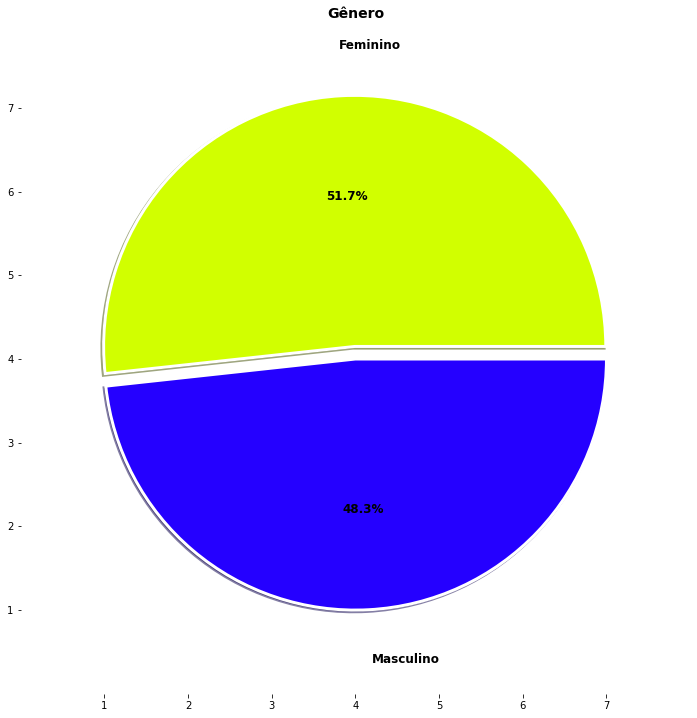

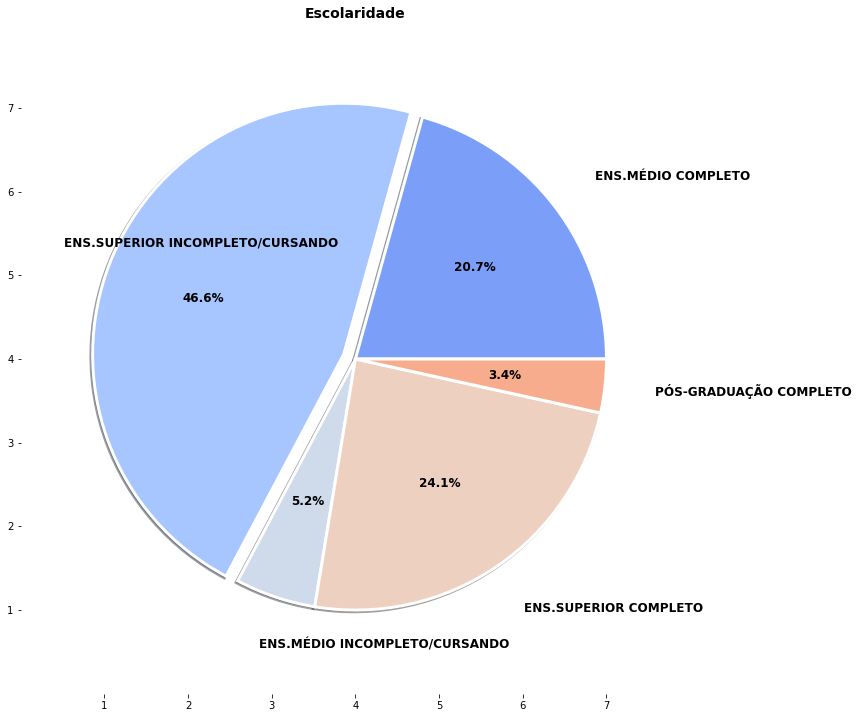

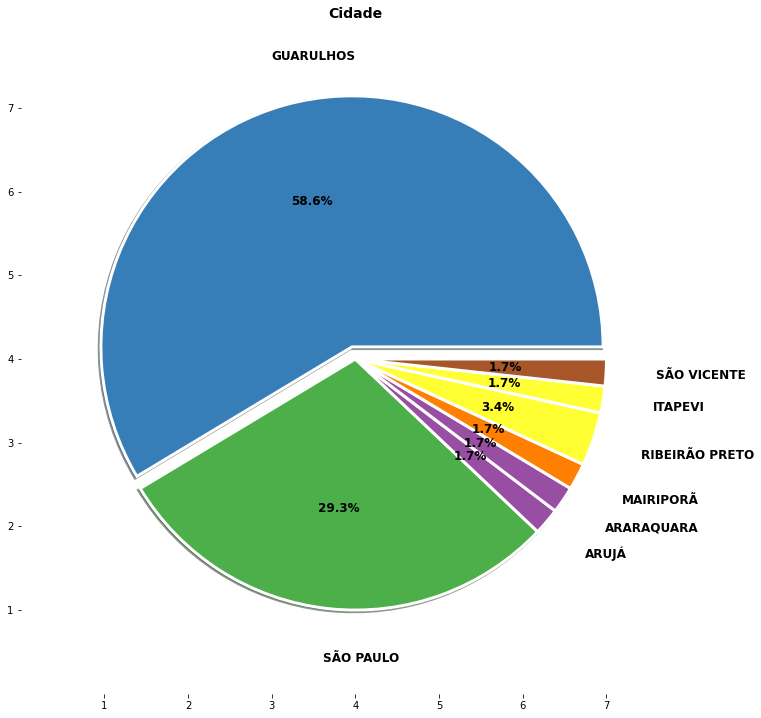

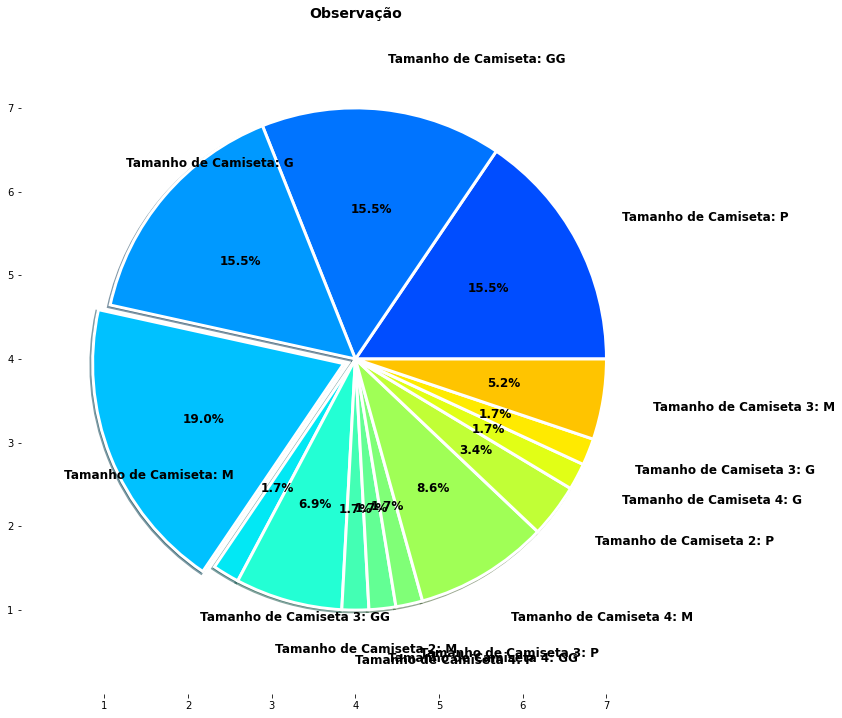

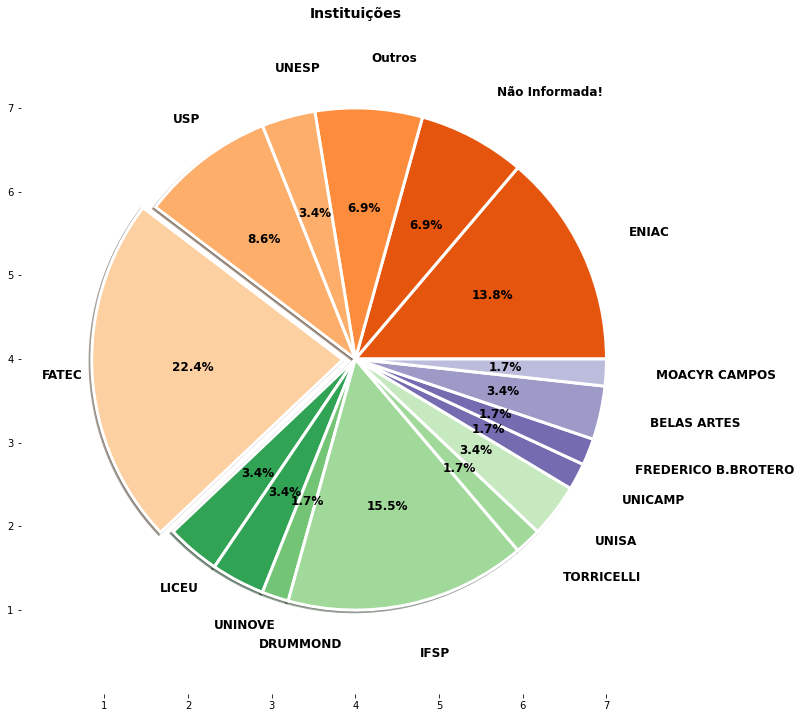

In [18]:
#
pieGraph(dataPieGraph(ins['genero'])
        ,titulo='Gênero'
        ,nomeArquivo='./Imagens2/Genero.jpg'
        ,colorMap='hsv'
        )

pieGraph(dataPieGraph(ins['escolaridade2'])
        ,titulo='Escolaridade'
        ,nomeArquivo='./Imagens2/Escolaridade.jpg'
        ,colorMap='coolwarm'
        )

pieGraph(dataPieGraph(ins['cidade'])
        ,titulo='Cidade'
        ,nomeArquivo='./Imagens2/Cidade.jpg'
        ,colorMap='Set1'
        )

pieGraph(dataPieGraph(ins['camiseta'])
        ,titulo='Observação'
        ,nomeArquivo='./Imagens2/Observacao.jpg'
        ,colorMap='jet'
        )

pieGraph(dataPieGraph(ins['instituicaoAjustada'])
        ,titulo='Instituições'
        ,nomeArquivo='./Imagens2/Instituicao.jpg'
        ,colorMap='tab20c'
        )

### Gráfico de pizza com agrupamento de dado e seleção.

In [19]:
insInst=pd.DataFrame(ins.groupby('instituicaoAjustada')['nome'].count())
insInst.reset_index(inplace=True)
insInst=insInst[(insInst['nome']>=3)]
insInst

,instituicaoAjustada,nome
2,ENIAC,8
3,FATEC,13
5,IFSP,9
8,Não Informada!,4
9,Outros,4
15,USP,5


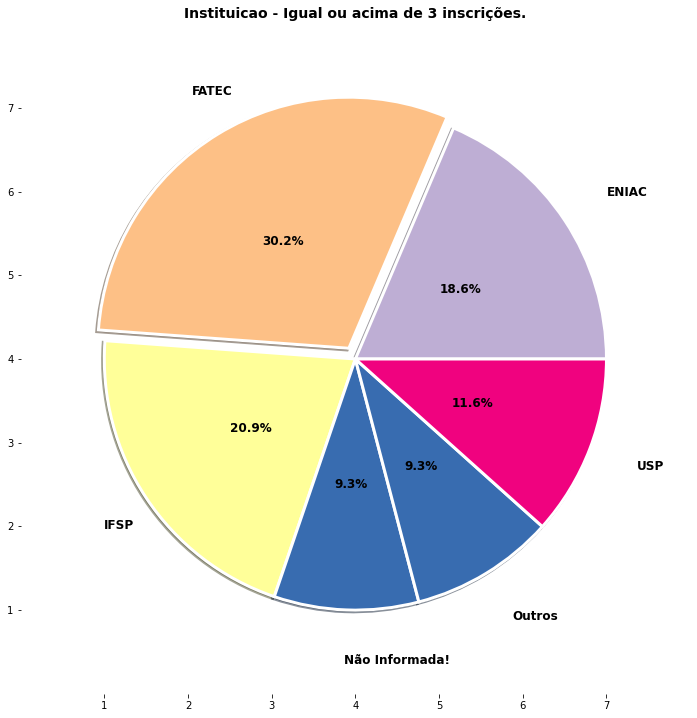

In [20]:
def pieGraphCompute(data, etiquetas, **kwargs):
    
    colormap='viridis'
    nomeArquivo='./Imagens2/'+'Instituicao_AcimaDe'+'.jpg'
    
    for chave in kwargs:
        if (chave=='titulo'):
            titulo=kwargs[chave]
        if (chave=='colormap'):
            colormap=kwargs[chave]
        if (chave=='arquivo'):
            nomeArquivo='./imagens2/'+kwargs['arquivo']
            
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})

    explode=explodePie(data)

    ax.pie(x=data
            ,labels=etiquetas
            ,colors=colors
            ,autopct='%1.1f%%'
            ,pctdistance=.5
            ,labeldistance=1.2
            ,radius=3
            ,wedgeprops={"linewidth": 3, "edgecolor": "white"}
            ,textprops={'size':12, 'weight':'bold'}
            ,center=(4,4)
            ,frame=False
            ,explode=explode
            ,shadow=True
           )
    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300) #, orietation='landscape')
    plt.show()

pieGraphCompute(data=insInst['nome'], 
                etiquetas=insInst['instituicaoAjustada'],
                titulo='Instituicao - Igual ou acima de 3 inscrições.', 
                colormap='Accent',
                arquivo='Instituicao_AcimaDe.jpg'
               )

### Gráfico de pizza calculando faixa de valores.

Faixa de dados:
 [['De 15 à 19.', 'De 20 à 29.', 'De 30 à 39.', 'De 40 à 49.', '50+'], [19, 33, 5, 0, 1]]: 


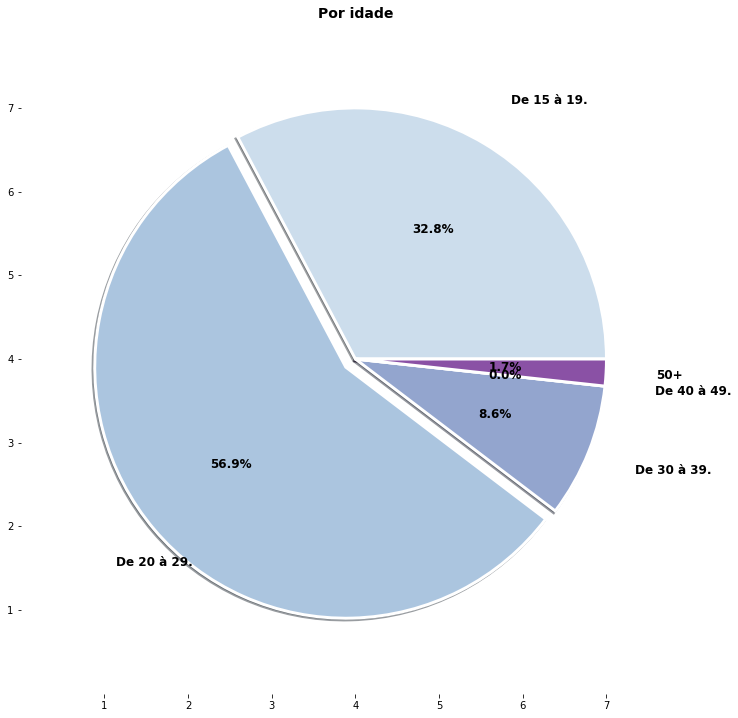

In [21]:
dataPie=dataComputeByRange([ #{'abaixo':0},{'min':1,'max':14},
                           {'min':15,'max':19},{'min':20,'max':29},{'min':30,'max':39},
                           {'min':40,'max':49},{'acima':50}],
                        ins['idade'] 
                   )
print('Faixa de dados:\n {dataPie}: '.format(dataPie=dataPie))

pieGraph(dataPie
        ,titulo='Por idade'
        ,nomeArquivo='./Imagens2/PorIdade.jpg'
        ,colorMap='BuPu')

### Scatter Plot .

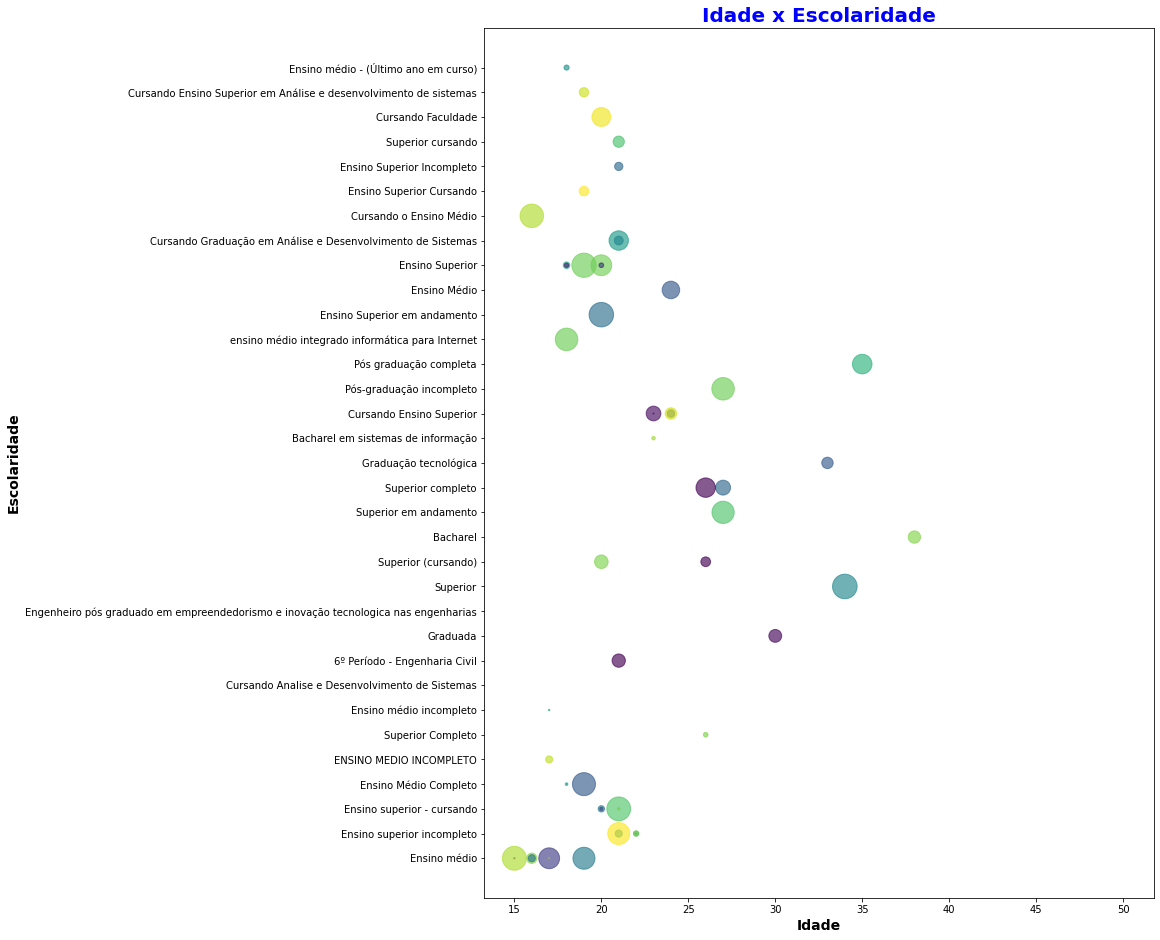

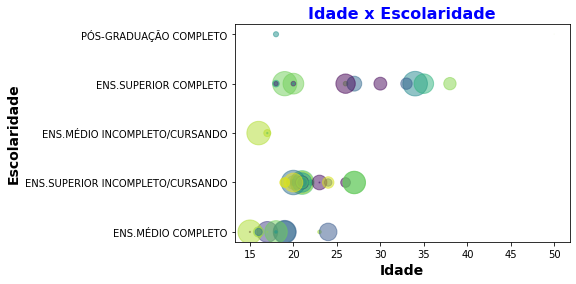

In [22]:
def scatterPlot():
    idade=ins['idade']
    escolar1=ins['escolaridade']
    escolar2=ins['escolaridade2']

    N=len(idade)
    colors = np.random.rand(N)
    area = (25 * np.random.rand(N))**2
    
    plt.figure(figsize=(12,16))
    plt.title('Idade x Escolaridade', c='blue', fontsize=20, fontweight='bold')
    plt.scatter(idade, escolar1, s=area, c=colors, alpha=.65)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens2/Scatter01.jpg', dpi=300, orientation='landscape')
    plt.show()

    plt.title('Idade x Escolaridade', c='blue', fontsize=16, fontweight='bold')
    plt.scatter(idade, escolar2, s=area, c=colors, alpha=.5)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens2/Scatter02.jpg', dpi=300, orientation='landscape')
    plt.show()

scatterPlot()

### Gráfico de linha (plot).

In [23]:
def graficoGenerico(dataFrame, **kwargs):
    #np.random.seed(8192)
    ## Kwargs
    titulo= "Título" if (kwargs.get('titulo') is None) else kwargs.get('titulo')
    xlabel= "Eixo X" if (kwargs.get('xlabel') is None) else kwargs.get('xlabel')
    ylabel= "Eixo Y" if (kwargs.get('ylabel') is None) else kwargs.get('ylabel')
    rotacao= 0 if (kwargs.get('rotacao') is None) else kwargs.get('rotacao')
    arquivo= './imagens2/Grafico'+str(np.random.randint(1,100)).zfill(3)+'.jpg' if (kwargs.get('arquivo') is None) else kwargs.get('arquivo')
    
    plt.figure(figsize=(12,16))
    plt.title(titulo, {'fontsize':20,'fontweight':'bold', 'color':'Blue'})
    
    plt.xlabel(xlabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.ylabel(ylabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.xticks(rotation=rotacao)
    
    plt.plot(dataFrame, linewidth=2.5, color='Green', marker='s', 
                 mec='blue', markersize=12 )
    plt.savefig(arquivo, dpi=300, orientation='landscape')
    plt.show()

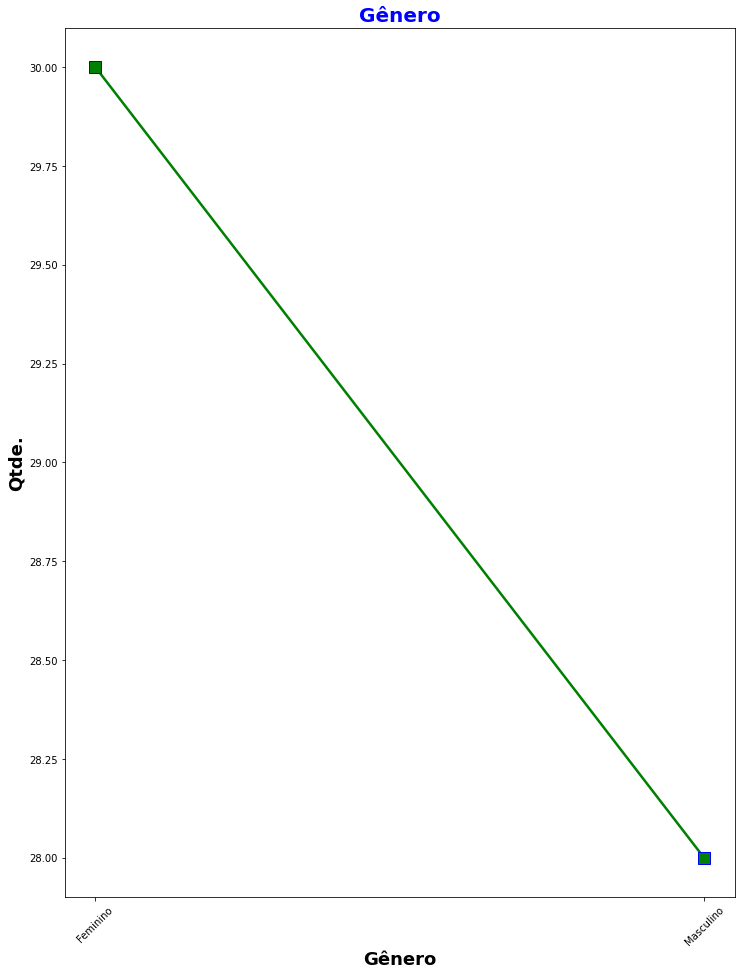

In [24]:
ins1=ins.groupby('genero')['genero'].count()
    
graficoGenerico(ins1, titulo='Gênero', xlabel='Gênero', ylabel='Qtde.', 
                rotacao=45, arquivo='./imagens2/Grafico_001.jpg')

### Gerar um atquivo html com os principais dados.

In [25]:
# https://stackoverflow.com/questions/50807744/apply-css-class-to-pandas-dataframe-using-to-html
def geraHTML(dataFrame, arquivoHTML = 'index_grupos.html', 
             cssStyle = 'style.css', titulo = 'Html'):
    html_string = '''
        <!DOCTYPE html>
        <html lang='pt-br'>
          <head>
              <title>{titulo}</title>
          </head>
          <link rel="stylesheet" type="text/css" href="{css}"/>
          <body>
                {tabela}
          </body>
        </html>
    '''
    with open(arquivoHTML, 'w') as arquivo:
        arquivo.write(html_string.format(titulo=titulo,
                               tabela=dataFrame.to_html(
                                       index=False,
                                       justify='center',
                                       classes='mystyle'),
                               css=cssStyle
                              ))
    
insHtml=ins[['situacaoAjustada','nome','dataNascimento','dataNascAjustada','idade','genero','generoId',
             'escolaridade','escolaridade2','instituicao','instituicaoAjustada',
             'cidade','grupo','camiseta',]]       
insHtml.columns=[['Situação','Nome','Data Nascimento','Data Nasc.','Idade','Gênero','Id.Gênero',
                  'Escolaridade','Escolar.Ajustado','Instituição','Inst.Ajustada',
                  'Cidade','Grupo','Camiseta']]  
        
geraHTML(insHtml, 
         './html/Hackathon 2024 - Grupos.html','../css/df_style.css',
         'Hackathon 2024 - Inscrições')

#### Nested Pie (Gráfico de Pizza interna).
#### https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [26]:
insGrafico=ins[['nome','idade','genero','instituicaoAjustada','grupo','camiseta']]
insGrafico.head()

,nome,idade,genero,instituicaoAjustada,grupo,camiseta
7,Laís Souza,17,Feminino,ENIAC,GRUPO 02,Tamanho de Camiseta: P
6,Marcus Vinicius Gomes Pereira,19,Masculino,Não Informada!,GRUPO 02,Tamanho de Camiseta: GG
8,Maria Clara Pereira Elídio,16,Feminino,ENIAC,GRUPO 02,Tamanho de Camiseta: G
5,Nicoli Mian Ventura de Paula,17,Feminino,ENIAC,GRUPO 02,Tamanho de Camiseta: M
12,Ana samira velasquez chinchilla,21,Feminino,Outros,GRUPO 03,Tamanho de Camiseta 3: GG


In [27]:
## Fase 1 - Filtrar os dados.
colecao=insGrafico[(insGrafico['grupo']!='N')][['grupo','idade']]
colecao.sort_values(by=['grupo','idade'],inplace=True)
# Teste
#colecao=colecao[(colecao['grupo']=='GRUPO 01')|(colecao['grupo']=='GRUPO 02')|(colecao['grupo']=='GRUPO 03')]
colecao

,grupo,idade
8,GRUPO 02,16
7,GRUPO 02,17
5,GRUPO 02,17
6,GRUPO 02,19
12,GRUPO 03,21
10,GRUPO 03,21
11,GRUPO 03,22
13,GRUPO 03,22
16,GRUPO 04,20
15,GRUPO 04,20


In [28]:
## Fase 2 - Quantificar o número de components por grupo e pela idade, obtendo a quantidade máxima.
## Para composição do Array do Gráfico de Pizza intermo.
maxComp=colecao.groupby('grupo').count()
maxComp=maxComp['idade'].max()
print('Máximo de componentes por grupo e idade: {max}'.format(max=maxComp))

Máximo de componentes por grupo e idade: 5


In [29]:
## Fase 3 - Montagem dos arrays de dados e das etiquetas.

# Monta as etiquetas de grupo!
grupo=[]
for grp in colecao['grupo'].values:
    adiciona=True
    for grpUnico in grupo:
        if (grpUnico==grp):
            adiciona=False
            break
    if (adiciona):
        grupo.append(grp)

# Monta o array com os dados.
# Lembrando que cada array interno deverá ter a mesma quantidade de elementos:
# [ [n1, n2, n3], [n1, n2, n3], [n1, n2, n3], ... ] 
dadosGrupo=[]; etiquetaInterna=[]
for grp in grupo:
    subArrayGrupo=[]
    dadoGrp=colecao[(colecao['grupo']==grp)][['grupo','idade']]
    for i in dadoGrp.values:
        subArrayGrupo.append(float(i[1]))

        # Adiciona as etiquetas do array interno.
        etiquetaInterna.append(str(i[1]))

    if (len(subArrayGrupo)<maxComp):
        completar=(maxComp-len(subArrayGrupo))
        for i in range(0,completar):
            subArrayGrupo.append(float(0))

            ## Adiciona estiquetas vazias para a coerencia com os dados do array interno
            etiquetaInterna.append('')

    dadosGrupo.append(subArrayGrupo)

def saida():
    print('Etiqueta dos grupos (array:grupo):\n', grupo)
    print('Quantidade de grupos:', len(grupo), '\n')
    print('Etiqueta dos dados internos (array:labelInnerPie):\n', etiquetaInterna)
    print('Quantidade de etiquetas internas:', len(etiquetaInterna), '\n')
    print('Dados do grupo (array:dataGrupo):\n', dadosGrupo)
    print('Quantidade por grupo:', len(dadosGrupo)*maxComp)

saida()

Etiqueta dos grupos (array:grupo):
 ['GRUPO 02', 'GRUPO 03', 'GRUPO 04', 'GRUPO 10', 'GRUPO 11', 'GRUPO 12', 'GRUPO 13', 'GRUPO 14', 'GRUPO 15', 'GRUPO 23', 'GRUPO 5', 'GRUPO 6', 'GRUPO 7', 'GRUPO 8', 'GRUPO 9']
Quantidade de grupos: 15 

Etiqueta dos dados internos (array:labelInnerPie):
 ['16', '17', '17', '19', '', '21', '21', '22', '22', '', '20', '20', '21', '21', '', '17', '17', '19', '26', '', '21', '21', '30', '50', '', '20', '22', '26', '34', '', '27', '27', '33', '38', '', '23', '23', '24', '27', '35', '18', '20', '20', '24', '', '23', '24', '', '', '', '18', '18', '19', '20', '', '16', '19', '21', '21', '', '15', '15', '16', '20', '', '21', '26', '', '', '', '18', '21', '', '', '']
Quantidade de etiquetas internas: 75 

Dados do grupo (array:dataGrupo):
 [[16.0, 17.0, 17.0, 19.0, 0.0], [21.0, 21.0, 22.0, 22.0, 0.0], [20.0, 20.0, 21.0, 21.0, 0.0], [17.0, 17.0, 19.0, 26.0, 0.0], [21.0, 21.0, 30.0, 50.0, 0.0], [20.0, 22.0, 26.0, 34.0, 0.0], [27.0, 27.0, 33.0, 38.0, 0.0], [23.0,

### Monta o Nested Pie.

In [30]:
def innerPie(dados, labelOuterPie, labelInnerPie, **kwargs):

    titulo='Título'; arquivoImagem='InnerPie_'+str(np.random.randint(1,999)).zfill(3)
    for kgs in kwargs:
        if (kgs=='titulo'):
            titulo=kwargs[kgs]
        if (kgs=='arquivoimagem'):
            arquivoImagem=kwargs[kgs]
  
    fig, ax = plt.subplots(figsize=(12,16))
    
    size = 0.3
    #vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    # Dados, valores...
    vals = np.array(dados)
    
    cmap = plt.colormaps["Set2"]
    outer_colors = cmap(np.arange(4)*2)
    inner_colors = cmap([1, 2, 5, 6, 9, 10])
    
    ax.pie(vals.sum(axis=1), 
           labels=labelOuterPie,
           radius=1, 
           colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=True,
           labeldistance=1.08
           )
    
    ax.pie(vals.flatten(), 
           labels=labelInnerPie,
           radius=1-size, 
           colors=inner_colors, 
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=False,
           labeldistance=.75
           )
    
    ax.set(aspect="equal", title=titulo)
    plt.savefig('./Imagens2/'+arquivoImagem, dpi=300, orientation='landscape')
    plt.show()

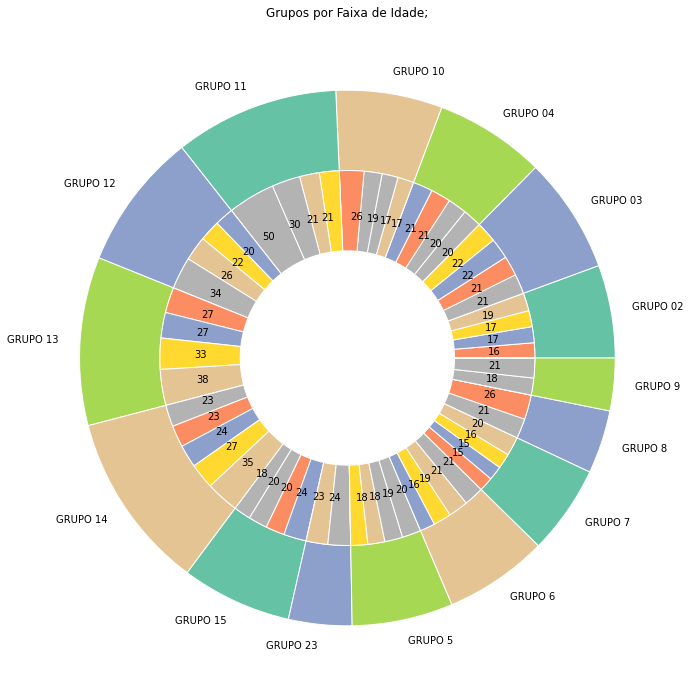

In [31]:
innerPie(dadosGrupo, grupo, etiquetaInterna, titulo='Grupos por Faixa de Idade;', arquivoimagem='InnerPie_001.jpg')

In [32]:
insGrp=ins[(ins['grupo']!='N')][['nome','idade','grupo']]
insGrp.groupby(['grupo','idade'])[['grupo','idade']].count()
insGrp.reset_index()
insGrp.sort_values(by=['grupo','idade','nome'], inplace=True)
insGrp

,nome,idade,grupo
8,Maria Clara Pereira Elídio,16,GRUPO 02
7,Laís Souza,17,GRUPO 02
5,Nicoli Mian Ventura de Paula,17,GRUPO 02
6,Marcus Vinicius Gomes Pereira,19,GRUPO 02
12,Ana samira velasquez chinchilla,21,GRUPO 03
10,Giulia Evelin Oliveira Castro,21,GRUPO 03
11,Guilherme Augusto de Souza Pereira,22,GRUPO 03
13,Nina Hinohara Aso,22,GRUPO 03
16,Elias Pinheiro Neto,20,GRUPO 04
15,Pedro Henrique Ribeiro de Azevedo,20,GRUPO 04


In [33]:
### Valor máxino por grupo:
valorMax=insGrp.groupby(['grupo'])['idade'].count().max()

### Total de grupos:
grupoIdade=[]
for grp in insGrp['grupo']:
    adiciona=True
    for i in grupoIdade:
        if (grp==i):
            adiciona=False
            break
    if (adiciona):
        grupoIdade.append(grp)

data=[]; etiquetaInterna=[]
for grp in grupoIdade:
    dataGrp=[]
    
    agruparIdade=insGrp[(insGrp['grupo']==grp)].groupby(['idade'])[['idade']].count()
    agruparIdade.columns=['idade1']
    agruparIdade.reset_index(inplace=True)
    agruparIdade.columns=['idade','total']

    soma=agruparIdade['total'].sum()
    
    cont=0
    for i in agruparIdade.values:
        cont+=1

        ## Percentual
        dataGrp.append(i[1]/soma)

        ## Etiqueta...
        etiquetaInterna.append(str(i[0]))

    if (cont<valorMax):
        for ind in range(0,(valorMax-cont)):
            dataGrp.append(0);
            etiquetaInterna.append('')

    data.append(dataGrp)

### Outputs...
def saida1():
    print('Valor máximo de componentes por grupo: {max}\n'.format(max=valorMax))
    print('Grupos:\n', grupoIdade, '\n')
    print('Etiquetas:\n', etiquetaInterna, '\n')
    print('Quantidade de etiquetas: {qtde}.\n'.format(qtde=len(etiquetaInterna)))
    print('Dados:\n', data, '\n')
    print('Quantidade de "arrays" de dados: {qtde}.'.format(qtde=len(data)))
    print('Quantidade de dados por valor máximo de {max}: {qtde}.'.format(qtde=len(data)*valorMax, max=valorMax))

saida1()

Valor máximo de componentes por grupo: 5

Grupos:
 ['GRUPO 02', 'GRUPO 03', 'GRUPO 04', 'GRUPO 10', 'GRUPO 11', 'GRUPO 12', 'GRUPO 13', 'GRUPO 14', 'GRUPO 15', 'GRUPO 23', 'GRUPO 5', 'GRUPO 6', 'GRUPO 7', 'GRUPO 8', 'GRUPO 9'] 

Etiquetas:
 ['16', '17', '19', '', '', '21', '22', '', '', '', '20', '21', '', '', '', '17', '19', '26', '', '', '21', '30', '50', '', '', '20', '22', '26', '34', '', '27', '33', '38', '', '', '23', '24', '27', '35', '', '18', '20', '24', '', '', '23', '24', '', '', '', '18', '19', '20', '', '', '16', '19', '21', '', '', '15', '16', '20', '', '', '21', '26', '', '', '', '18', '21', '', '', ''] 

Quantidade de etiquetas: 75.

Dados:
 [[0.25, 0.5, 0.25, 0, 0], [0.5, 0.5, 0, 0, 0], [0.5, 0.5, 0, 0, 0], [0.5, 0.25, 0.25, 0, 0], [0.5, 0.25, 0.25, 0, 0], [0.25, 0.25, 0.25, 0.25, 0], [0.5, 0.25, 0.25, 0, 0], [0.4, 0.2, 0.2, 0.2, 0], [0.25, 0.5, 0.25, 0, 0], [0.5, 0.5, 0, 0, 0], [0.5, 0.25, 0.25, 0, 0], [0.25, 0.25, 0.5, 0, 0], [0.5, 0.25, 0.25, 0, 0], [0.5, 0.5, 0, 0,

### Inner Pie - Agrupado por Idade.

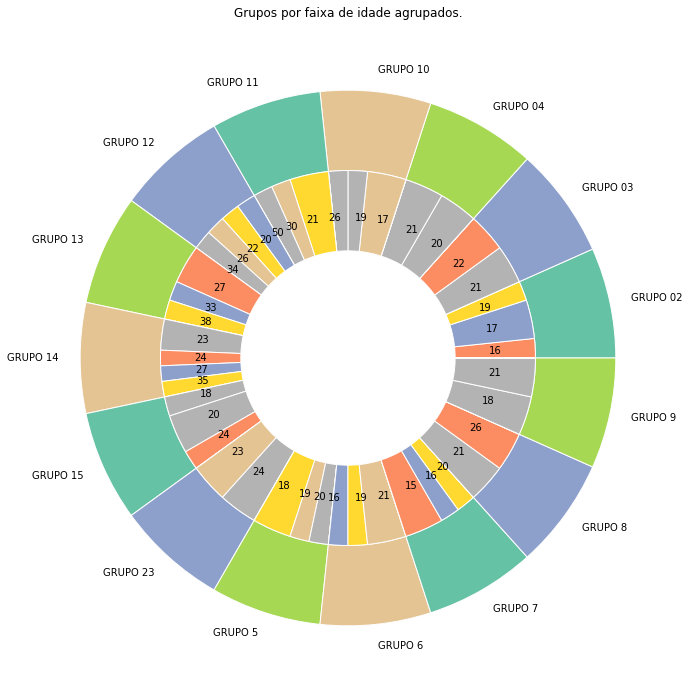

In [34]:
innerPie(data, grupoIdade, etiquetaInterna, titulo='Grupos por faixa de idade agrupados.', arquivoimagem='InnerPie_002.jpg')

### FacetGrid.

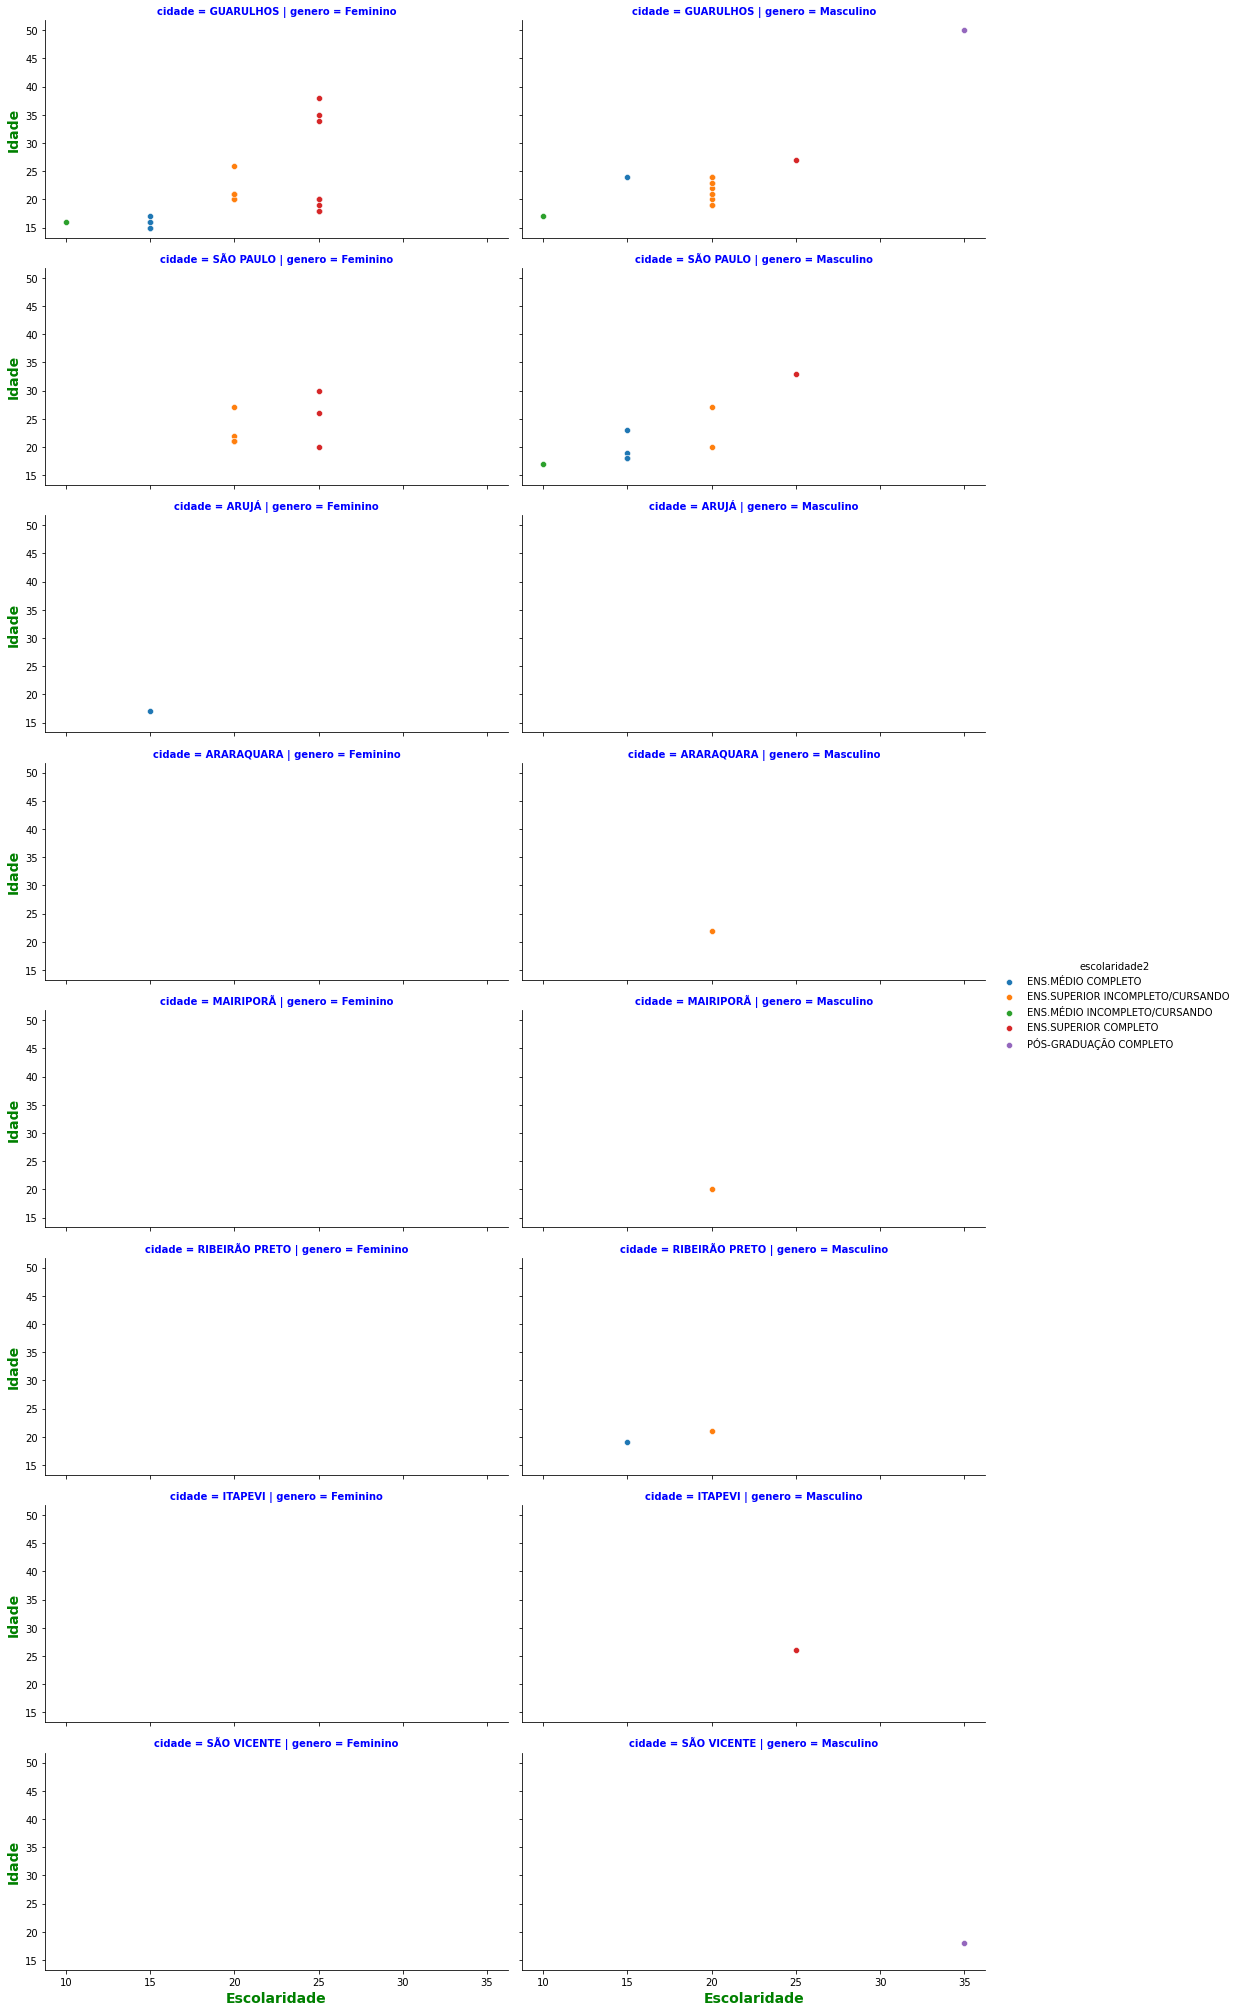

In [35]:
def facetGridPlot(**kwargs):
    arquivoimagem='./Imagens2/facetGrid_001.jpg'
    for kg in kwargs:
        if (kg=='arquivoimagem'):
            arquivoimagem='./Imagens2/'+kwargs[kg]
    
    grid=sns.FacetGrid(data=ins, row='cidade', col='genero', hue='escolaridade2', 
                       height=3.5, aspect=2, palette=sns.color_palette("tab10")
                        )
    grid.map(sns.scatterplot, 'escolaridadeId', 'idade')
    grid.add_legend()
    grid.set_titles(fontweight='bold', fontsize=24, color='Blue')
    grid.set_xlabels(label='Escolaridade', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'green'})
    grid.set_ylabels(label='Idade', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'green'})
    grid.savefig(arquivoimagem, dpi=300, orientation='landscape')
    plt.show()

facetGridPlot()

In [36]:
#### Tabela.
cidade='RIBEIRÃO PRETO'
ins[(ins['cidade']==cidade)][['escolaridade','escolaridade2','escolaridadeId','idade','genero','cidade']]

,escolaridade,escolaridade2,escolaridadeId,idade,genero,cidade
51,Ensino Médio Completo,ENS.MÉDIO COMPLETO,15,19,Masculino,RIBEIRÃO PRETO
39,Ensino Superior Incompleto,ENS.SUPERIOR INCOMPLETO/CURSANDO,20,21,Masculino,RIBEIRÃO PRETO


### End

In [37]:
tips = sns.load_dataset("tips")

In [38]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


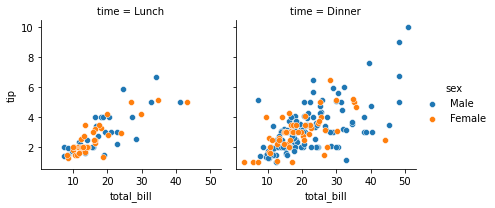

In [39]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()